<a href="https://colab.research.google.com/github/NateAdventures/MephiMsc/blob/main/NathanC_DataPythonFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

Задание 1: Работа с массивами NumPy
Цель: Проверить знание методов NumPy для анализа данных.

Задание:

Создайте массив случайных чисел (50 элементов) из диапазона [10, 100].
Найдите:
Среднее арифметическое массива.
Медиану.
Стандартное отклонение.
Создайте новый массив, где каждое число изначального массива делится на 3. Отфильтруйте числа, которые делятся без остатка.

Ожидаемый ответ:

Вывод среднего, медианы, стандартного отклонения.
Новый массив и его фильтр.


In [ ]:
random_ar = np.random.randint(10, 101, size=50) # Создание массива из 50 чисел в диапозоне от 10 до 100
print("Наш массив рандомных чисел:")
print(random_ar)

mean_value = random_ar.mean() # Среднее арифмитическое
median_value = np.median(random_ar) # Медиана
std_dev = np.std(random_ar) # Стандартное отклонение

div_ar = random_ar /3
print("\nНовый массив деленный на 3:\n", div_ar)
div_ar = div_ar[random_ar % 3 == 0] #Числа делящиеся на 3

print("\nСреднее арифметическое:", mean_value)
print("Медиана:", median_value)
print("Стандартное отклонение:", std_dev)
print("\nЧисла делящиеся на 3 без остатка:\n", div_ar)

Наш массив рандомных чисел:
[ 50  64  99  52  91  14  28  32  17  25  82  35  39  11  39  11  31  57
  93  30  72  51  78  10  96  48  58  26  62  88  51  21  46  20 100  81
  74  54  91  76  64  26  16  36  85  26  25  61  86  26]

Новый массив деленный на 3:
 [16.66666667 21.33333333 33.         17.33333333 30.33333333  4.66666667
  9.33333333 10.66666667  5.66666667  8.33333333 27.33333333 11.66666667
 13.          3.66666667 13.          3.66666667 10.33333333 19.
 31.         10.         24.         17.         26.          3.33333333
 32.         16.         19.33333333  8.66666667 20.66666667 29.33333333
 17.          7.         15.33333333  6.66666667 33.33333333 27.
 24.66666667 18.         30.33333333 25.33333333 21.33333333  8.66666667
  5.33333333 12.         28.33333333  8.66666667  8.33333333 20.33333333
 28.66666667  8.66666667]

Среднее арифметическое: 51.08
Медиана: 50.5
Стандартное отклонение: 27.26231098054602

Числа делящиеся на 3 без остатка:
 [33. 13. 13. 19. 31. 

Задание 2: Анализ данных с помощью Pandas

Цель: Проверить навыки анализа и обработки данных.

Данные: Используйте предоставленный CSV-файл ("sales_data_large.csv"),

содержащий данные о продажах с полями:

date (дата продаж),
region (регион),
product (продукт),
sales (объем продаж).

Задание:

Определите:

Общее количество записей.

Какие регионы и продукты присутствуют в данных.

Подсчитайте:

Общие продажи по регионам.

Средний объем продаж для каждого продукта.

Постройте сводную таблицу, показывающую средние продажи по регионам и продуктам.

Ожидаемый ответ:

Итоги анализа данных.

Построенная сводная таблица.

In [ ]:
df = pd.read_csv("sales_data_large.csv")
df.head(5)

,date,region,product,sales
0,2024-12-01,West,Widget C,246
1,2024-12-01,South,Widget B,152
2,2024-12-01,West,Widget B,391
3,2024-12-01,West,Widget A,272
4,2024-12-01,East,Widget A,337


In [ ]:
# Основная информация
num_records = len(df)
regions = df["region"].unique()
product = df["product"].unique()

# Группировка данных
sales = df.groupby("region")["sales"].sum()
avg_sales = df.groupby("product")["sales"].mean()

# Создание сводной таблицы
pivot_sales = df.pivot_table(values="sales", index="region", columns="product", aggfunc="mean")

# Вывод результатов
print(f"Количество записей: {num_records}")
print(f"Регионы: {regions}")
print(f"Продукты: {product}")
print("\nПродажи по регионам:\n", sales)
print("\nСредние продажи по продуктам:\n", avg_sales)
print(f"\nСводная таблица:\n {pivot_sales}")

Количество записей: 500
Регионы: ['West' 'South' 'East' 'North']
Продукты: ['Widget C' 'Widget B' 'Widget A']

Продажи по регионам:
 region
East     29244
North    39605
South    33023
West     35171
Name: sales, dtype: int64

Средние продажи по продуктам:
 product
Widget A    275.424242
Widget B    268.331361
Widget C    278.614458
Name: sales, dtype: float64

Сводная таблица:
 product    Widget A    Widget B    Widget C
region                                     
East     291.464286  263.116279  271.361111
North    289.145833  238.477273  304.660000
South    277.380952  282.833333  263.722222
West     250.106383  291.550000  267.136364


Задание 3:
Очистка данных и визуализация

Цель: Проверить умение находить и исправлять ошибки в данных, а также визуализировать их.

Данные: Используйте предоставленный CSV-файл ("sales_cleaning_large.csv"), содержащий данные о продажах с возможными пропущенными и некорректными значениями. Поля:

date (дата продаж),
sales (объем продаж),
region (регион).

Задание:

Найдите и устраните ошибки в данных:

Заполните пропущенные даты.

Удалите отрицательные значения в столбце sales или замените их на медиану столбца.

Заполните пропущенные значения в sales средним значением.

Постройте график продаж по датам. Убедитесь, что даты упорядочены.

Ожидаемый ответ:

Обработанный DataFrame.

Построенный график.

In [ ]:
#Я рещил использовать df еще раз чтобы не тянул случайно те же данные (ретроспективно это была ошибка больше не буду так делать)
df = pd.read_csv("sales_cleaning_large.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    190 non-null    object 
 1   sales   190 non-null    float64
 2   region  200 non-null    object 
dtypes: float64(1), object(2)
memory usage: 4.8+ KB


In [ ]:
print("Уникальные значения в 'date':\n", df['date'].unique())

Уникальные значения 'date':
 ['2024-12-01' '2024-12-02' '2024-12-03' '2024-12-04' '2024-12-05'
 '2024-12-06' '2024-12-07' '2024-12-08' '2024-12-09' '2024-12-10'
 '2024-12-11' '2024-12-12' '2024-12-13' '2024-12-14' '2024-12-15'
 '2024-12-16' '2024-12-17' '2024-12-18' '2024-12-19' '2024-12-20'
 '2024-12-21' '2024-12-22' '2024-12-23' '2024-12-24' '2024-12-25'
 '2024-12-26' '2024-12-27' '2024-12-28' '2024-12-29' '2024-12-30'
 '2024-12-31' nan]


In [ ]:
missing_dates = df[df['date'].isnull()]
print("Пропуски в 'date':\n", missing_dates)

Пропуски в 'date':
     date  sales region
190  NaN  150.0  South
191  NaN -500.0   West
192  NaN   50.0   West
193  NaN  350.0  South
194  NaN -350.0  South
195  NaN  400.0   West
196  NaN -150.0   West
197  NaN -500.0  South
198  NaN -350.0   East
199  NaN  -50.0  North


10 пропусков в date

In [ ]:
# Уникальные значения в sales
print("Уникальные значения 'sales':\n", df['sales'].unique())

Уникальные значения 'sales':
 [-450.  400. -100.  350.   50.  250.  -50. -250. -200. -150.   nan  100.
 -300. -350.    0.  200. -500.  450.  300.  150. -400.]


In [ ]:
# Значения меньше 0 в sales
negative = df[df['sales'] < 0]
print("Отрицательные значения в 'sales':\n", negative)

Отрицательные значения в 'sales':
            date  sales region
0    2024-12-01 -450.0   East
2    2024-12-01 -100.0  South
7    2024-12-02  -50.0  South
8    2024-12-02 -250.0   West
9    2024-12-02 -450.0  South
..          ...    ...    ...
194         NaN -350.0  South
196         NaN -150.0   West
197         NaN -500.0  South
198         NaN -350.0   East
199         NaN  -50.0  North

[89 rows x 3 columns]


In [ ]:
# Пропуски в sales
missing = df[df['sales'].isnull()]
print("Пропуски в 'sales':\n", missing)

Пропуски в 'sales':
            date  sales region
15   2024-12-03    NaN  South
23   2024-12-04    NaN  South
33   2024-12-06    NaN  North
43   2024-12-07    NaN   East
83   2024-12-13    NaN   West
84   2024-12-13    NaN   West
92   2024-12-15    NaN  North
107  2024-12-17    NaN  North
112  2024-12-18    NaN   East
165  2024-12-28    NaN   West


**89 отрицательных значений и 10 NAN**

In [ ]:
# Обработка столбца 'date'
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')

In [ ]:
# Определяем полный диапазон date
date_range = pd.date_range(start=df['date'].min(), end=df['date'].max())

In [ ]:
# Заполнение пропусков в date
df['date'] = df['date'].apply(lambda x: np.random.choice(date_range) if pd.isnull(x) else x)


In [ ]:
# Проверяем результат
print("Обновленные уникальные значения 'date':", df['date'].unique())

Обновленные уникальные значения 'date': <DatetimeArray>
['2024-12-01 00:00:00', '2024-12-02 00:00:00', '2024-12-03 00:00:00',
 '2024-12-04 00:00:00', '2024-12-05 00:00:00', '2024-12-06 00:00:00',
 '2024-12-07 00:00:00', '2024-12-08 00:00:00', '2024-12-09 00:00:00',
 '2024-12-10 00:00:00', '2024-12-11 00:00:00', '2024-12-12 00:00:00',
 '2024-12-13 00:00:00', '2024-12-14 00:00:00', '2024-12-15 00:00:00',
 '2024-12-16 00:00:00', '2024-12-17 00:00:00', '2024-12-18 00:00:00',
 '2024-12-19 00:00:00', '2024-12-20 00:00:00', '2024-12-21 00:00:00',
 '2024-12-22 00:00:00', '2024-12-23 00:00:00', '2024-12-24 00:00:00',
 '2024-12-25 00:00:00', '2024-12-26 00:00:00', '2024-12-27 00:00:00',
 '2024-12-28 00:00:00', '2024-12-29 00:00:00', '2024-12-30 00:00:00',
 '2024-12-31 00:00:00']
Length: 31, dtype: datetime64[ns]


In [ ]:
# Обработка столбца sales
median_sales = df.loc[df['sales'] > 0, 'sales'].median()
print(f"Медианное значение для замены: {median_sales}")

Медианное значение для замены: 250.0


In [ ]:
# Замена отрицательных и пропущенных значений в sales
df['sales'] = df['sales'].apply(lambda x: median_sales if x < 0 else x)
df['sales'].fillna(median_sales, inplace=True)

<ipython-input-135-0034731f7799>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sales'].fillna(median_sales, inplace=True)


In [ ]:
# Проверяем результат
print("Обновленные уникальные значения 'sales':", df['sales'].unique())

Обновленные уникальные значения 'sales': [250. 400. 350.  50. 100.   0. 200. 300. 450. 150.]


In [ ]:
# Сортировка данных по датам
df = df.sort_values(by='date')

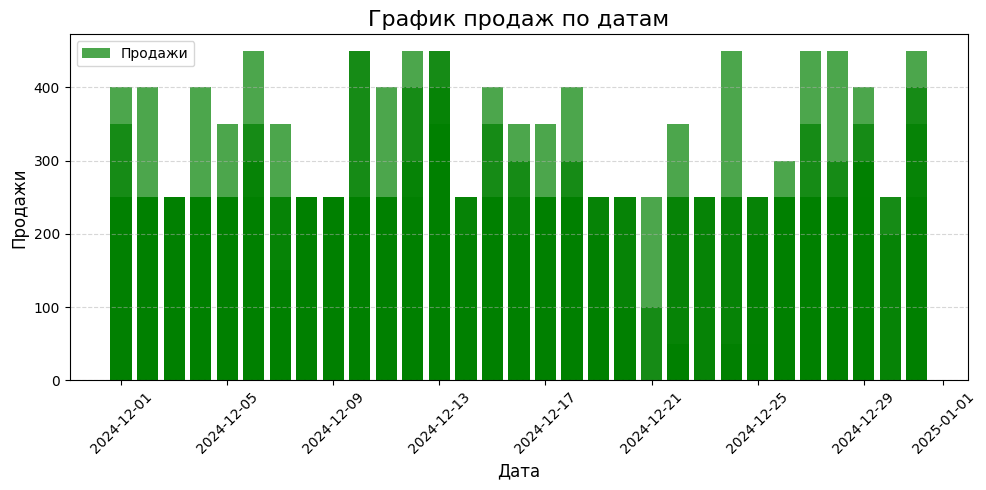

In [ ]:
# Построение графика
plt.figure(figsize=(10, 5))
plt.bar(df['date'], df['sales'], color='green', alpha=0.7, label='Продажи')
plt.title('График продаж по датам', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Продажи', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

Задание 4:
Получение данных из API

Цель: Проверить способность работать с веб-данными.

Задание:

Используйте открытое API (например, https://jsonplaceholder.typicode.com/users).

Загрузите данные и создайте DataFrame с полями: id, name, email, company_name.

Выведите таблицу с пользователями, работающими в компаниях, название которых содержит слово "Group".

Ожидаемый ответ:

DataFrame с результатами фильтрации.

In [ ]:
# Загружаем данные
link = "https://jsonplaceholder.typicode.com/users"

response = requests.get(link)
data = response.json()
dframe = pd.DataFrame(data)

# Проверяем данные
dframe

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,"{'street': 'Norberto Crossing', 'suite': 'Apt....",1-477-935-8478 x6430,ola.org,"{'name': 'Considine-Lockman', 'catchPhrase': '..."
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,"{'street': 'Rex Trail', 'suite': 'Suite 280', ...",210.067.6132,elvis.io,"{'name': 'Johns Group', 'catchPhrase': 'Config..."
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,"{'street': 'Ellsworth Summit', 'suite': 'Suite...",586.493.6943 x140,jacynthe.com,"{'name': 'Abernathy Group', 'catchPhrase': 'Im..."
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,"{'street': 'Dayna Park', 'suite': 'Suite 449',...",(775)976-6794 x41206,conrad.com,"{'name': 'Yost and Sons', 'catchPhrase': 'Swit..."
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,"{'street': 'Kattie Turnpike', 'suite': 'Suite ...",024-648-3804,ambrose.net,"{'name': 'Hoeger LLC', 'catchPhrase': 'Central..."


In [ ]:
# Создаем company name
dframe['company_name'] = dframe['company'].apply(lambda x: x['name'])
# Создаем даатфрейм с со столбцами из задания
new_df = dframe[['id', 'name', 'email', 'company_name']]

# Ищем пользователей название компаний которых содержит "Group"
filter = new_df[new_df['company_name'].str.contains("Group", case=False, na=False)]
print("Пользователи в компаниях названиe которых содержит слово: 'Group':\n")
filter

Пользователи в компаниях названиe которых содержит слово: 'Group':



,id,name,email,company_name
6,7,Kurtis Weissnat,Telly.Hoeger@billy.biz,Johns Group
7,8,Nicholas Runolfsdottir V,Sherwood@rosamond.me,Abernathy Group
